In [1]:
import json
import pandas as pd

# Load the most recent snapshot
# df = pd.read_json("../../data_storage/remotive_job_api/2025-04-03/historical_dataset.json")
df = pd.read_json("../../data_storage/remotive_job_api/2025-04-09/daily.json")
df.shape


(1568, 13)

In [3]:
df.head()

,id,url,title,company_name,company_logo,category,tags,job_type,publication_date,candidate_required_location,salary,description,company_logo_url
0,1991596,https://remotive.com/remote-jobs/qa/software-q...,Software QA Engineer,Angelroute,https://remotive.com/job/1991596/logo,QA,[react native],full_time,2025-04-02T08:51:41,Egypt,,<p>We are a fast-growing startup building a mo...,NaN
1,1991568,https://remotive.com/remote-jobs/devops/devops...,DevOps Engineer,Gladia,https://remotive.com/job/1991568/logo,DevOps / Sysadmin,"[docker, kubernetes, python, CI/CD]",full_time,2025-04-02T08:51:36,France,€55k to €75k base + bspces,"<div class=""h1""><strong>About Gladia </strong>...",NaN
2,1990900,https://remotive.com/remote-jobs/project-manag...,Associate Project Manager,Intersectpower,https://remotive.com/job/1990900/logo,Project Management,"[accounting, excel, security, video, project m...",full_time,2025-04-02T08:51:28,USA,"usd $85,000 - $95,000 base salary with 20-25% ...","<div><b style=""font-size: 18px"">Company Overvi...",NaN
3,1991054,https://remotive.com/remote-jobs/product/platf...,Platform Product Manager,15Five,https://remotive.com/job/1991054/logo,Product,[product management],full_time,2025-04-02T08:51:24,USA,"$220,000 - $240,000 + equity + bonus + benefits","<div><span style="""">As a Platform Product Mana...",NaN
4,1987788,https://remotive.com/remote-jobs/marketing/pro...,Product Marketing Manager,Attentive,https://remotive.com/job/1987788/logo,Marketing,"[product marketing, market research]",full_time,2025-04-02T08:51:17,USA,"$125,000 - $140,000 annually + equity + benefits","<div><span style="""">Attentive® is the AI-power...",NaN


In [4]:
df.columns.tolist()

['id',
 'url',
 'title',
 'company_name',
 'company_logo',
 'category',
 'tags',
 'job_type',
 'publication_date',
 'candidate_required_location',
 'salary',
 'description',
 'company_logo_url']

In [ ]:
df["category"].value_counts()

category
Software Development    294
Sales / Business        150
DevOps / Sysadmin       149
Marketing               128
Customer Service        121
Design                  115
Finance / Legal         107
Product                  87
Project Management       77
Data Analysis            74
All others               70
Writing                  65
QA                       55
Human Resources          49
Name: count, dtype: int64

In [7]:
from collections import Counter

# Flatten all tags from all job rows into a single list
all_tags = [tag for tags in df["tags"] for tag in tags]
Counter(all_tags) #.most_common(15)

Counter({'python': 205,
         'sql': 136,
         'AWS': 134,
         'insurance': 126,
         'saas': 122,
         'diversity': 120,
         'AI/ML': 112,
         'security': 108,
         'go': 102,
         'research': 100,
         'kubernetes': 92,
         'excel': 91,
         'analytics': 89,
         'automation': 88,
         'healthcare': 87,
         'product management': 83,
         'travel': 80,
         'cloud': 80,
         'CI/CD': 78,
         'project management': 78,
         'documentation': 76,
         'javascript': 76,
         'terraform': 74,
         'accounting': 72,
         'onboarding': 72,
         'startup': 68,
         'testing': 66,
         'Figma': 64,
         'agile': 64,
         'infrastructure': 59,
         'react': 59,
         'account management': 56,
         'CRM': 53,
         'salesforce': 49,
         'business development': 49,
         'partnerships': 48,
         'azure': 48,
         'mental health': 42,
         'java'

Matplotlib is building the font cache; this may take a moment.


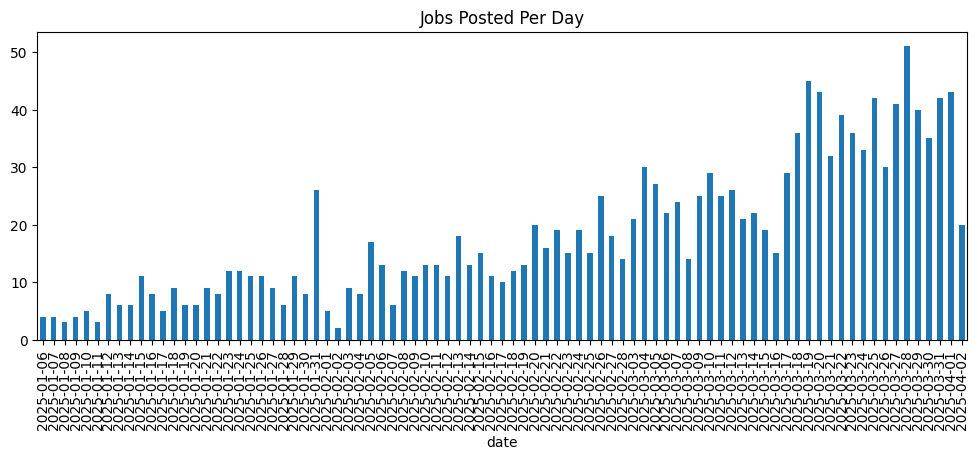

In [9]:
import matplotlib.pyplot as plt

df["publication_date"] = pd.to_datetime(df["publication_date"])
df["date"] = df["publication_date"].dt.date

df.groupby("date").size().plot(kind="bar", figsize=(12, 4), title="Jobs Posted Per Day")
plt.show()

In [10]:
df["publication_date"] = pd.to_datetime(df["publication_date"])  # ensure it's a datetime type
min_date = df["publication_date"].min()
print(min_date)

2025-01-06 14:51:53


In [4]:
df["publication_date"] = pd.to_datetime(df["publication_date"])


In [5]:
max_timestamp = df["publication_date"].max()
print(max_timestamp)

2025-04-02 08:51:41


In [4]:
# Count and sort unique location values
location_summary = (
    df['candidate_required_location']
    .value_counts(dropna=False)
    .reset_index()
    .rename(columns={'index': 'location', 'candidate_required_location': 'count'})
)

# Top 20 locations
location_summary#.head(20)

# Filter locations that mention "remote"
# location_summary[location_summary['location'].str.contains('remote', case=False, na=False)]

,count,count
0,USA,791
1,Canada,66
2,Europe,60
3,Worldwide,57
4,UK,57
...,...,...
119,"New Zealand, Philippines",1
120,"LATAM, Canada",1
121,"EMEA, USA, UK",1
122,"Europe, UK, Asia",1


In [5]:
import re

def parse_salary(salary_str):
    if not isinstance(salary_str, str):
        return None

    # Remove currency symbols and lowercase
    s = salary_str.lower().replace(",", "")
    
    # Match salary range like "$100000 - $150000 usd"
    match = re.findall(r'\d+', s)
    if not match:
        return None

    # Convert to integers
    nums = list(map(int, match))
    if len(nums) == 1:
        return nums[0]
    elif len(nums) >= 2:
        return sum(nums[:2]) // 2  # average of first two numbers

    return None

# Apply to the dataframe
df['salary_usd_estimate'] = df['salary'].apply(parse_salary)

# Quick look
df[['salary', 'salary_usd_estimate']].dropna().head(10)

,salary,salary_usd_estimate
0,"$85,000 - $100,000 usd",92500.0
1,$200k - $240k,220.0
3,"$119,800 - $164,780 + bonus eligible",142290.0
5,"$138,750 - $185,000",161875.0
11,"$95,000 - $110,000 + $5,000 performance-based ...",102500.0
12,"$67,000 - $90,000",78500.0
13,"$130,000 to $220,000",175000.0
19,"$120,000 - $178,000",149000.0
22,"$132,000-$180,000",156000.0
39,"$118,560.00 - $167,960.00",59280.0
